CS663 Machine Learning Assignment 1

In [238]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [448]:
#Base cluster Class Here
class cluster:
    def __init__(self):
        pass

    def fit(self, X):
        pass

In [478]:
#Question 1: Implementation of K_Means
class K_Means(cluster):
    def __init__(self,k=5,max_iter=300):
        self.k_ = k;
        #set tolerance as 0.0001
        self.tolerance_ = 0.0001
        self.max_iter_ = max_iter
    def fit(self,X):
        self.centers_ = {}
        for i in range(self.k_):
            self.centers_[i] = X[i]
        
        self.assignment_={}
        
        for i in range(self.max_iter_):
            
            self.clusters_={}
            for i in range(self.k_):
                self.clusters_[i] = []
            self.assignment_= []
            for feature in X:
                distances = []
                for center in self.centers_:
                    distances.append(np.linalg.norm(feature-self.centers_[center]))
                classification = distances.index(min(distances))
                self.clusters_[classification].append(feature)
                self.assignment_.append(classification)
            
            prev_centers = dict(self.centers_)
            for c in self.clusters_:
                self.centers_[c] = np.average(self.clusters_[c],axis=0)
            
            finished = False
            
            for center in self.centers_:
                org_center = prev_centers[center]
                cur_center = self.centers_[center]
                if np.sum((cur_center-org_center)/org_center) > self.tolerance_:
                    finished = True
                if finished:
                    break
            
        return self.assignment_, self.centers_
            

In [458]:
#Testing the K_Means implementation
from sklearn.datasets import make_blobs
X, cluster_assignments = make_blobs(n_samples=200, centers=4,
cluster_std=0.60, random_state=0)

In [459]:
print(cluster_assignments)

[1 2 0 3 1 0 2 0 0 0 0 1 2 2 1 0 3 3 3 1 3 2 1 2 1 1 3 1 1 0 3 0 2 1 2 0 2
 0 0 3 3 3 3 0 1 2 0 3 3 0 3 2 2 3 0 3 2 1 0 1 3 0 1 0 3 0 1 3 2 2 1 1 0 0
 2 3 2 2 1 1 3 0 1 2 2 0 0 1 2 2 3 3 3 0 0 1 2 3 0 0 3 1 1 3 3 2 0 1 1 0 3
 2 2 1 1 0 2 2 3 0 3 2 0 1 0 2 0 2 1 0 2 1 2 3 3 2 3 3 1 3 1 2 1 1 2 1 0 1
 2 3 3 3 0 2 1 0 3 2 3 1 3 1 1 2 2 3 0 1 1 2 1 0 2 3 3 3 0 0 2 0 2 1 0 1 0
 2 2 3 0 3 1 1 0 3 2 2 2 0 3 1]


In [460]:
#Apply k_means
k_means = K_Means(k=4,max_iter=10)
assignment,centers = k_means.fit(X)

In [262]:
#1st output: The assignment from k_means
#The values does not align but the clustering is correct
print(assignment)

[0, 1, 2, 3, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 3, 3, 3, 0, 3, 1, 0, 1, 0, 0, 3, 0, 0, 2, 3, 2, 1, 0, 1, 2, 1, 2, 2, 3, 3, 3, 3, 2, 0, 1, 2, 3, 3, 2, 3, 1, 1, 3, 2, 3, 1, 0, 2, 0, 3, 2, 0, 2, 3, 2, 0, 3, 1, 1, 0, 0, 2, 2, 1, 3, 1, 1, 0, 0, 3, 2, 0, 1, 1, 2, 2, 0, 1, 1, 3, 3, 3, 2, 2, 0, 1, 3, 2, 2, 3, 0, 0, 3, 3, 1, 2, 0, 0, 2, 3, 1, 1, 0, 0, 2, 1, 1, 3, 2, 3, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 3, 3, 1, 3, 3, 0, 3, 0, 1, 0, 0, 1, 0, 2, 0, 1, 3, 3, 3, 2, 1, 0, 2, 3, 1, 3, 0, 3, 0, 0, 1, 1, 3, 2, 0, 0, 1, 0, 2, 1, 3, 3, 3, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 3, 2, 3, 0, 0, 2, 3, 1, 1, 1, 2, 3, 0]


{0: array([2.07187892, 0.97422926]), 1: array([-1.62401415,  2.9159629 ]), 2: array([0.90793962, 4.35713791]), 3: array([-1.34842715,  7.72096548])}


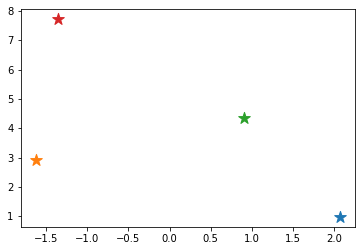

In [263]:
#2nd output: The centers
print(centers)
for center in centers:
    pyplot.scatter(centers[center][0], centers[center][1],marker='*',s=150)

In [465]:
#Question 2: Implementation of balanced K-Means
class K_Means_Extend(cluster):
    def __init__(self,k=5,max_iter=300,is_balanced=False):
        self.k_ = k;
        self.tolerance_ = 0.0001
        self.max_iter_ = max_iter
        self.is_balanced_ = is_balanced
    def fit(self,X):
        self.centers_ = {}
        for i in range(self.k_):
            self.centers_[i] = X[i]
        
        self.assignment_={}
        self.bucketsize_ = len(X)/self.k_
                
        for i in range(self.max_iter_):
            self.clusters_={}
            for i in range(self.k_):
                self.clusters_[i] = []
            self.assignment_= []
            for feature in X:
                distances = []
                for center in self.centers_:
                    distances.append(np.linalg.norm(feature-self.centers_[center]))
                if self.is_balanced_:
                    placed = False
                    while(not placed):
                        classification = distances.index(min(distances))
                        if len(self.clusters_[classification]) <= self.bucketsize_:
                            self.clusters_[classification].append(feature)
                            self.assignment_.append(classification)
                            placed = True
                        else:
                            distances.remove(min(distances))
                else:
                    classification = distances.index(min(distances))
                    self.clusters_[classification].append(feature)
                    self.assignment_.append(classification)
            prev_centers = dict(self.centers_)
            for c in self.clusters_:
                self.centers_[c] = np.average(self.clusters_[c],axis=0)
            
            finished = False
            
            for center in self.centers_:
                org_center = prev_centers[center]
                cur_center = self.centers_[center]
                if np.sum((cur_center-org_center)/org_center) > self.tolerance_:
                    finished = True
                
                if finished:
                    break
            
        return self.assignment_, self.centers_

In [466]:
#Test balanced/non-balanced clustering
test = np.array([[1,2],[1.5,1.8],[1,0.7],[1,0.8],[2,2],[5,8],[8,8],[1,0.6],[9,11]])
k_means_unbalanced = K_Means_Extend(k=2)
k_means_unbalanced.fit(test)

([0, 0, 0, 0, 0, 1, 1, 0, 1],
 {0: array([1.25      , 1.31666667]), 1: array([7.33333333, 9.        ])})

In [467]:
#non-balanced clustering
for index in k_means_unbalanced.clusters_:
    print(len(k_means_unbalanced.clusters_[index]))

6
3


In [468]:
#balanced clustering
k_means_balanced = K_Means_Extend(k=2,is_balanced=True)
k_means_balanced.fit(test)
for index in k_means_balanced.clusters_:
    print(len(k_means_balanced.clusters_[index]))

4
5


From the testing result, we can see that the extend K-Means has a more balanced cluster size.

In [277]:
#Question 3 Choose and Run Clustering Algorithms
#3.1 Chicago Taxi Dataset
chicago_taxi_df = pd.read_csv('chicago_taxi.csv')

In [8]:
chicago_taxi_pickup_df = chicago_taxi_df.iloc[:-1,17:19]

In [280]:
chicago_taxi_pickup_df = chicago_taxi_pickup_df.dropna()

In [371]:
chicago_taxi_pickup_sample_df = chicago_taxi_pickup_df.sample(frac=0.01)

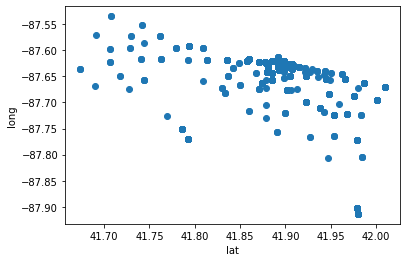

In [373]:
import matplotlib.pyplot as plt
plt.scatter(chicago_taxi_pickup_sample_df['Pickup Centroid Latitude'], chicago_taxi_pickup_sample_df['Pickup Centroid Longitude'])
plt.xlabel('lat')
plt.ylabel('long')
plt.show()

1. I chose to run DBSCAN algorithm for clustering, because it is useful for classifying geolocation data.
2. I did a simple exloration of data before running the algorithm. Firstly applied an iloc filter to obtain the Pickup Centroid Latitude & Pickup Centroid Longitude as input. Then filtered out the rows with non-number data. Finally, I created a sample dataframe with a fraction rate of 0.01 as the training dataset.

In [386]:
from sklearn.cluster import DBSCAN
max_dist = 0.02
hoodsize = 5
cluster = DBSCAN(eps=max_dist, min_samples=hoodsize)
cluster.fit(chicago_taxi_pickup_sample_df)
# Association between observations & clusters.
labels = cluster.labels_

In [387]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [388]:
print("Estimated number of clusters: %d" %n_clusters_)

Estimated number of clusters: 14


In [389]:
print("Estimated number of noise points: %d" %n_noise_)

Estimated number of noise points: 60


In [390]:
core_samples_mask = np.zeros_like(cluster.labels_, dtype=bool)
core_samples_mask[cluster.core_sample_indices_] = True
labels = cluster.labels_

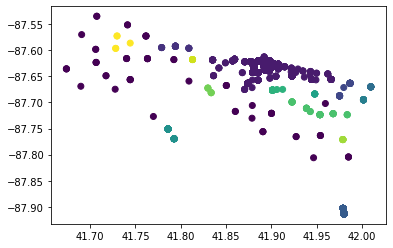

In [392]:
plt.scatter(chicago_taxi_pickup_sample_df['Pickup Centroid Latitude'], chicago_taxi_pickup_sample_df['Pickup Centroid Longitude'], c=labels)

3. There are 14 clusters for the result and shown in the scatter diagram above.
4. I am using the labels_ list to evaluate the output. There are 60 noise points among all the 2730 input data, and all the rest have been clustered. 

In [416]:
#3.2 Finnland Dataset
finland_df = pd.read_csv('Finland.txt', names=['lat','long'], sep='\t')

In [417]:
finland_df

,lat,long
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


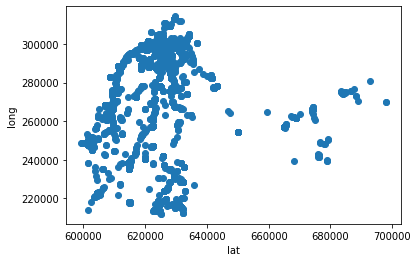

In [418]:
import matplotlib.pyplot as plt

plt.scatter(finland_df.lat, finland_df.long)
plt.xlabel('lat')
plt.ylabel('long')
plt.show()

In [419]:
from sklearn.cluster import DBSCAN
max_dist = 1500
hoodsize = 20
cluster = DBSCAN(eps=max_dist, min_samples=hoodsize)
cluster.fit(finland_df)
# Association between observations & clusters.
labels = cluster.labels_

In [420]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [421]:
print("Estimated number of clusters: %d" %n_clusters_)

Estimated number of clusters: 33


In [422]:
print("Estimated number of noise points: %d" %n_noise_)

Estimated number of noise points: 666


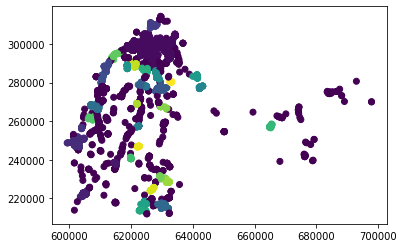

In [423]:
plt.scatter(finland_df['lat'], finland_df['long'], c=labels)

In [469]:
#Question 4: Performance Comparison
#Fit K-Means from the sklearn library:
weather_df = pd.read_csv('historical-weather.csv')
weather_df = weather_df.iloc[:,2:].dropna()

In [470]:
#perform a PCA to get train dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(weather_df)

In [471]:
principal_components

array([[-115.47731079,  -16.1333303 ],
       [-201.73965528,  -38.88952602],
       [  47.9187067 ,  -11.92471884],
       ...,
       [ 311.46740256,  -13.77198761],
       [-258.99480921,  -16.9827944 ],
       [ 295.99884166,  -20.87179365]])

In [482]:
#The sklearn KMEANS
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, max_iter=300)
kmeans.fit(principal_components)
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[  53.09033483,  -22.69305898],
       [-191.98969473,  -22.31399659],
       [  15.60796371,  205.65645806],
       [ 225.87424394,  -30.03457484]])

In [479]:
#My implementation of KMEANS
k_means = K_Means(k=4,max_iter=300)
k_means_assignment,_ = k_means.fit(principal_components)

In [480]:
k_means.centers_

{0: array([ 15.60796371, 205.65645806]),
 1: array([-191.98969473,  -22.31399659]),
 2: array([225.62506226, -29.99251268]),
 3: array([ 53.03683929, -22.69746933])}

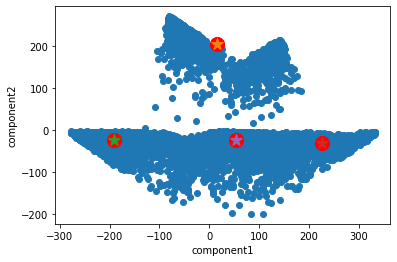

In [481]:
#difference of cluster centers:
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('component1')
plt.ylabel('component2')

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],color='red',s=200)

for center in k_means.centers_:
    pyplot.scatter(k_means.centers_[center][0], k_means.centers_[center][1],marker='*',s=150)

plt.show()

from the above diagram we can see that both implementations have same clustering centers.

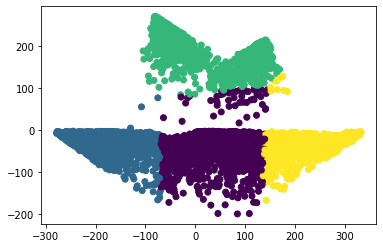

In [483]:
#Visualizing sklearn KMEANS:
plt.scatter(principal_components[:,0], principal_components[:,1], c=kmeans.labels_)

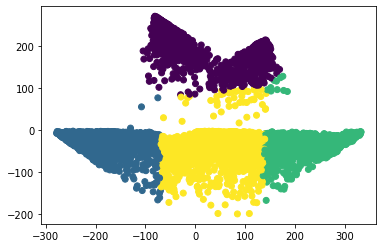

In [485]:
#Visualizing my implementation of KMEANS:
plt.scatter(principal_components[:,0], principal_components[:,1], c=k_means.assignment_)

from the diagram above we can find that both implementations of Kmeans can obtain the same result.